In [3]:
import pandas as pd
import numpy as np

movies = pd.read_csv('desafio_indicium_imdb.csv')
movies

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
print(f"O dataset tem {movies.shape[0]} linhas e {movies.shape[1]} colunas")

O dataset tem 999 linhas e 16 colunas


Verificando não-nulos e tipos de dados:

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Limpeza e qualidade dos dados:

In [6]:
print(f"Linha duplicadas: {movies.duplicated().sum()}")
print("\nDados faltantes por coluna:")
print(movies.isnull().sum().sort_values(ascending=False))

Linha duplicadas: 0

Dados faltantes por coluna:
Gross            169
Meta_score       157
Certificate      101
Unnamed: 0         0
Runtime            0
Genre              0
Series_Title       0
Released_Year      0
Overview           0
IMDB_Rating        0
Star1              0
Director           0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
dtype: int64


Coluna Gross:

Temos 169 valores faltantes na coluna Gross. Adotaremos a estratégia de remover as linhas com os dados faltantes para esta coluna.

In [7]:
movies_cleaned = movies.copy()
movies_cleaned.dropna(subset=['Gross'], inplace=True)
print(f"Shape do dataset após limpeza: {movies_cleaned.shape}")

Shape do dataset após limpeza: (830, 16)


In [8]:
print("\nDados faltantes por coluna:")
print(movies_cleaned.isnull().sum().sort_values(ascending=False))


Dados faltantes por coluna:
Meta_score       81
Certificate      46
Series_Title      0
Unnamed: 0        0
Runtime           0
Genre             0
IMDB_Rating       0
Released_Year     0
Overview          0
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64


Coluna Meta_Score:

Adotaremos a estratégia de preenchimento dos valores faltantes com a mediana (média é mais sensível a outliers).

In [9]:
median_meta_score = movies_cleaned['Meta_score'].median()
print(f"Mediana da coluna Meta_score: {median_meta_score}")
movies_cleaned['Meta_score'] = movies_cleaned['Meta_score'].fillna(median_meta_score)

Mediana da coluna Meta_score: 78.0


Coluna Certificate:

Para os dados faltantes em Certificate, usaremos a moda.

In [10]:
movies_cleaned['Certificate'] = movies_cleaned['Certificate'].fillna('Unknown')

In [11]:
print("Verificando dados faltantes após limpeza:")
print(movies_cleaned.isnull().sum().sort_values(ascending=False))

Verificando dados faltantes após limpeza:
Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


Verificando relações entre variáveis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

movies_cleaned['Gross'] = movies_cleaned['Gross'].astype(str)
movies_cleaned['Gross'] = movies_cleaned['Gross'].str.replace(',', '', regex=False)
movies_cleaned['Gross'] = pd.to_numeric(movies_cleaned['Gross'], errors='coerce')
movies_cleaned['Meta_score'] = pd.to_numeric(movies_cleaned['Meta_score'], errors='coerce')

Pegando apenas o primeiro gênero (principal) de cada filme

In [13]:
movies_cleaned['Primary_Genre'] = movies_cleaned['Genre'].apply(lambda x: x.split(',')[0])
print("Contagem gêneros principais:")
print(movies_cleaned['Primary_Genre'].value_counts())

Contagem gêneros principais:
Primary_Genre
Drama        233
Action       141
Comedy       128
Crime         93
Biography     79
Animation     67
Adventure     61
Horror        10
Mystery        9
Western        4
Film-Noir      2
Family         2
Thriller       1
Name: count, dtype: int64


In [14]:
movies_cleaned[['IMDB_Rating', 'Gross']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 996
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  830 non-null    float64
 1   Gross        830 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 19.5 KB


Com isso, realizaremos uma análise multivariada, levando em consideração o número de votos que será representado pelo tamanho da bolha. Ou seja, estamos considerando os filmes mais votados. Assim podemos verificar quais cores de bolhas grandes estão mais altas (teve maior faturamento).

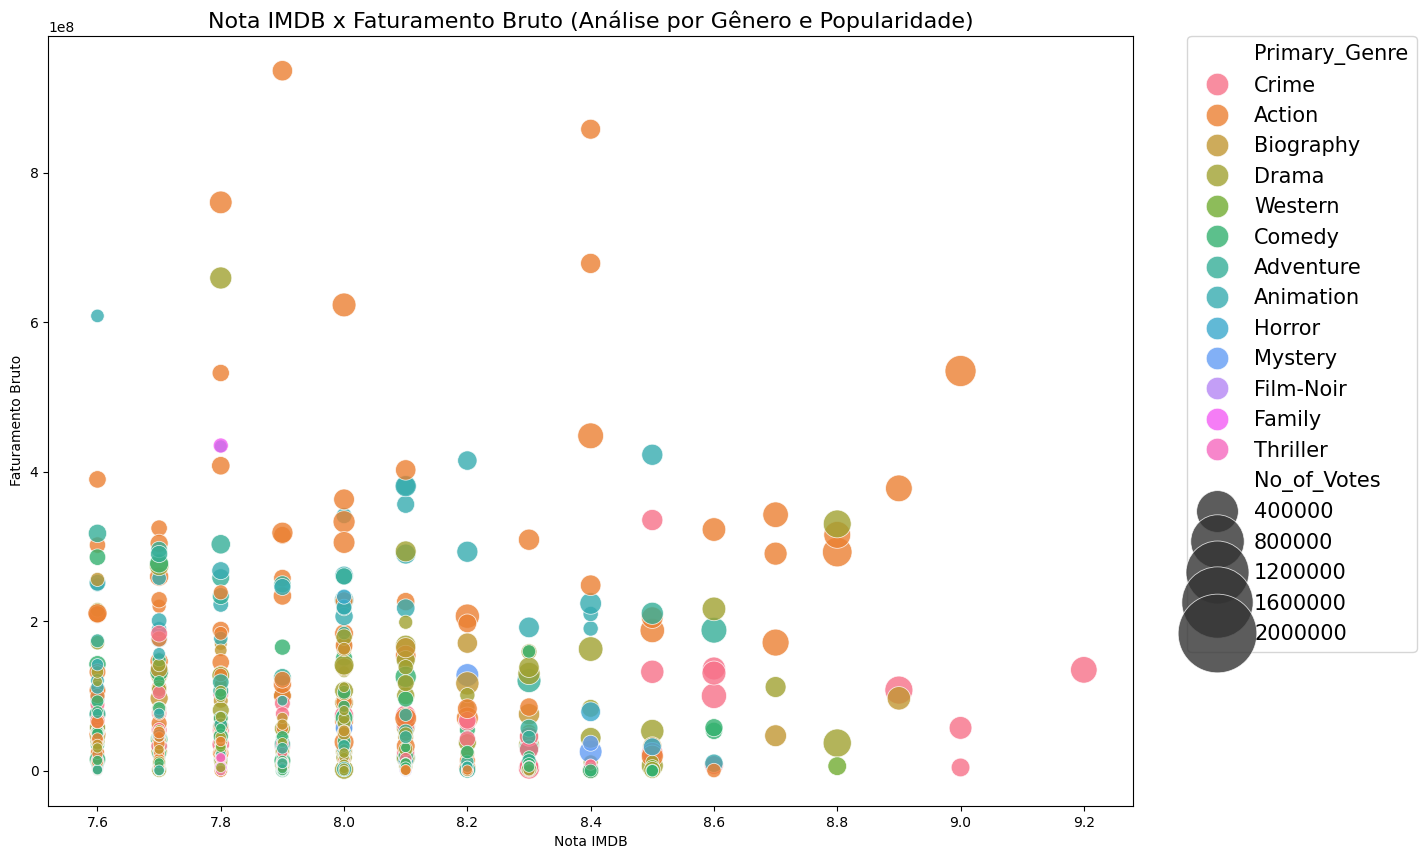

In [15]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot(
                data=movies_cleaned,
                x='IMDB_Rating',
                y='Gross',
                hue='Primary_Genre',
                size='No_of_Votes',
                sizes = (50,500),
                alpha= .8,
                ax=ax
                )

ax.set_title('Nota IMDB x Faturamento Bruto (Análise por Gênero e Popularidade)', fontsize=16)
ax.set_xlabel('Nota IMDB')
ax.set_ylabel('Faturamento Bruto')

ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.,
    title_fontsize='15',
    fontsize='15',
    markerscale=2.7
)
plt.show()

Pré-Procesamento para desenvolvimento do modelo. A variável alvo será IMDB_Rating

In [17]:
df_model = movies_cleaned.copy()

#1. Limpando coluna Runtime. Remove 'min' e converte para inteiro
df_model['Runtime'] = df_model['Runtime'].str.replace(' min', '', regex=False).astype(int)

#2. Seleciona colunas que vamos usar
features = [
    'Released_Year', 'Certificate', 'Runtime', 'Primary_Genre', 'Meta_score',
    'Director', 'Star1', 'No_of_Votes', 'Gross'
]
target = 'IMDB_Rating'

df_model = df_model[features + [target]]
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 996
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  830 non-null    object 
 1   Certificate    830 non-null    object 
 2   Runtime        830 non-null    int64  
 3   Primary_Genre  830 non-null    object 
 4   Meta_score     830 non-null    float64
 5   Director       830 non-null    object 
 6   Star1          830 non-null    object 
 7   No_of_Votes    830 non-null    int64  
 8   Gross          830 non-null    int64  
 9   IMDB_Rating    830 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 71.3+ KB


Para usarmos o One-Hot Encoding, trataremos as colunas 'Director' e 'Star1' para os 30 mais frequentes e agruparemos o resto em 'Other'.

In [18]:
#Identifica os 30 diretores mais frequentes
top_30_directors = df_model['Director'].value_counts().nlargest(30).index

#Substituir todos os outros por 'Other'
df_model['Director'] = df_model['Director'].where(df_model['Director'].isin(top_30_directors), 'Other')

#O mesmo para Star1
top_30_stars = df_model['Star1'].value_counts().nlargest(30).index
df_model['Star1'] = df_model['Star1'].where(df_model['Star1'].isin(top_30_stars), 'Other')

print("\nDiretores e Estrelas com baixa frequência agrupados em 'Other'.")
print(df_model['Director'].value_counts())


Diretores e Estrelas com baixa frequência agrupados em 'Other'.
Director
Other                    642
Steven Spielberg          13
Martin Scorsese           10
Alfred Hitchcock           9
David Fincher              8
Quentin Tarantino          8
Christopher Nolan          8
Clint Eastwood             8
Woody Allen                8
Rob Reiner                 7
Hayao Miyazaki             7
Ridley Scott               6
Sergio Leone               6
Wes Anderson               6
Richard Linklater          6
Joel Coen                  6
Stanley Kubrick            6
Billy Wilder               6
Ron Howard                 5
Peter Jackson              5
Francis Ford Coppola       5
Robert Zemeckis            5
James Cameron              5
Alfonso Cuarón             5
Denis Villeneuve           5
Charles Chaplin            5
Sidney Lumet               4
Akira Kurosawa             4
Anthony Russo              4
Alejandro G. Iñárritu      4
Fred Zinnemann             4
Name: count, dtype: int64


Dividir os dados em treino e teste

In [19]:
from sklearn.model_selection import train_test_split

x = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"\nDados divididos em treino ({X_train.shape[0]} amostras) e teste ({X_test.shape[0]} amostras).")


Dados divididos em treino (664 amostras) e teste (166 amostras).


Pipeline de Transformação usando ColumnTransformer

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Identifica os tipos de colunas
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

#Pipeline para features numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#Pipeline para features categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 'handle_unknown' evita erros se uma categoria aparecer no teste mas não no treino
])

#Combina os pipelines em um único pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplica o pré-processamento aos dados
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape dos dados de treino processados: {X_train_processed.shape}")
print(f"Shape dos dados de teste processados: {X_test_processed.shape}")

Shape dos dados de treino processados: (664, 180)
Shape dos dados de teste processados: (166, 180)


Iniciando o treinamento do modelo...
Treinamento concluído.
Fazendo previsões no conjunto de teste...

--- Performance do Modelo ---
Mean Absolute Error (MAE): 0.1477
Root Mean Squared Error (RMSE): 0.1888

Interpretação: Em média, o modelo erra a nota do IMDB por aproximadamente 0.15 pontos.


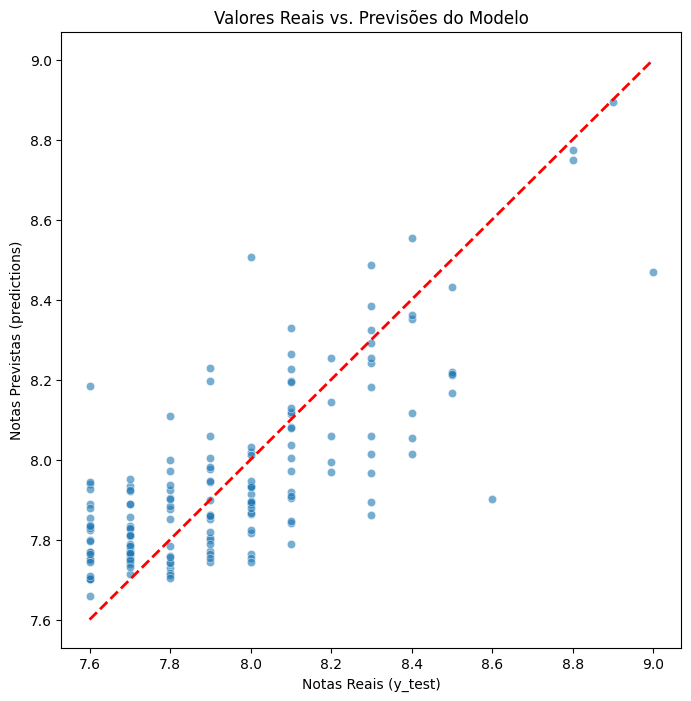

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializa o modelo
# random_state=42 garante que o resultado seja o mesmo toda vez que rodarmos.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Treinar o modelo
model.fit(X_train_processed, y_train)
print("Treinamento concluído.")

# 3. Fazer previsões no conjunto de teste
print("Fazendo previsões no conjunto de teste...")
predictions = model.predict(X_test_processed)

# 4. Avaliar a performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("\n--- Performance do Modelo ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("\nInterpretação: Em média, o modelo erra a nota do IMDB por aproximadamente", f"{mae:.2f}", "pontos.")

# 5. Visualizar os resultados
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
#Adicionando linha de referência
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reais vs. Previsões do Modelo')
plt.xlabel('Notas Reais (y_test)')
plt.ylabel('Notas Previstas (predictions)')
plt.show()

Salvar o modelo e o pré-processador

In [23]:
import joblib

joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']

Respondendo a questão 6

In [24]:
import pandas as pd

#Carrega o pré-processador e o modelo
loaded_preprocessor = joblib.load('preprocessor.pkl')
loaded_model = joblib.load('model.pkl')

# 1. Dados do novo filme
new_movie_data = {
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Primary_Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'No_of_Votes': 2343110,
    'Gross': '28341469'
}

# Criar um DataFrame com os dados
new_movie_df = pd.DataFrame([new_movie_data])

# 2. Aplicando as mesmas limpezas e transformações do pré-processamento
new_movie_df['Runtime'] = new_movie_df['Runtime'].str.replace(' min', '', regex=False).astype(int)
# Nota: O tratamento de alta cardinalidade já está embutido no preprocessor ('handle_unknown')

# 3. Usar o pré-processador carregado para transformar os dados
new_movie_processed = loaded_preprocessor.transform(new_movie_df)

# 4. Usar o modelo carregado para fazer a previsão
predicted_rating = loaded_model.predict(new_movie_processed)

print(f"\nPrevisão da nota IMDB para 'The Shawshank Redemption': {predicted_rating[0]:.2f}")

# A nota real do filme é 9.3, então podemos ver o quão perto o modelo chegou.


Previsão da nota IMDB para 'The Shawshank Redemption': 8.77


In [25]:
!pip freeze > requirements.txt